https://www.youtube.com/watch?v=yCgJGsg0Xa4&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=25

# How do I work with dates and times in pandas?

In [1]:
import pandas as pd

In [2]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


## How evaluated by day or time of the year?

In [3]:
# 'Time' is currently stored as a string
ufo.dtypes #times = object!

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [4]:
# hour could be accessed using string slicing, but this approach breaks too easily
ufo.Time.str.slice(-5, -3).astype(int).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

## better metodology - transform to day/time format

In [16]:
# convert 'Time' to datetime format
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


In [18]:
ufo.dtypes #Time = datetime64[ns]!

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
Year                        int64
dtype: object

Documentation for **to_datetime**

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html

## Aloud to filter by hour, weekly_name, year, dayofyear
https://pandas.pydata.org/pandas-docs/stable/reference/series.html#time-series-related

In [19]:
# convenient Series attributes are now available
ufo.Time.dt.hour.head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [21]:
ufo.Time.dt.weekday_name.head()

0     Sunday
1     Monday
2     Sunday
3     Monday
4    Tuesday
Name: Time, dtype: object

In [23]:
ufo.Time.dt.dayofyear.head()

0    152
1    181
2     46
3    152
4    108
Name: Time, dtype: int64

API reference for **datetime properties and methods**

https://pandas.pydata.org/pandas-docs/stable/api.html#datetimelike-properties

In [24]:
# convert a single string to datetime format (outputs a timestamp object)
ts = pd.to_datetime('1/1/1999')
ts

Timestamp('1999-01-01 00:00:00')

### use timestamps to comparison

In [25]:
# compare a datetime Series with a timestamp
ufo.loc[ufo.Time >= ts, :].head(10)

,City,Colors Reported,Shape Reported,State,Time,Year
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00,1999
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00,1999
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00,1999
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00,1999
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00,1999
12837,DeWitt,NaN,LIGHT,AR,1999-01-01 18:00:00,1999
12838,Bainbridge Island,NaN,NaN,WA,1999-01-01 19:12:00,1999
12839,Camano Island,NaN,FIREBALL,WA,1999-01-01 19:30:00,1999
12840,Cheaha Mountain,NaN,TRIANGLE,AL,1999-01-01 21:00:00,1999
12841,Coyoty Canyon,NaN,DISK,NM,1999-01-01 21:00:00,1999


In [9]:
ufo.Time.max()

Timestamp('2000-12-31 23:59:00')

In [26]:
# perform mathematical operations with timestamps (outputs a timedelta object)
ufo.Time.max() - ufo.Time.min()

Timedelta('25781 days 01:59:00')

In [27]:
# timedelta objects also have attributes you can access
(ufo.Time.max() - ufo.Time.min()).days

25781

## Numbers of years ploting

In [28]:
# allow plots to appear in the notebook
%matplotlib inline

In [29]:
# count the number of UFO reports per year
ufo['Year'] = ufo.Time.dt.year
ufo.Year.value_counts().sort_index().head()

1930    2
1931    2
1933    1
1934    1
1935    1
Name: Year, dtype: int64

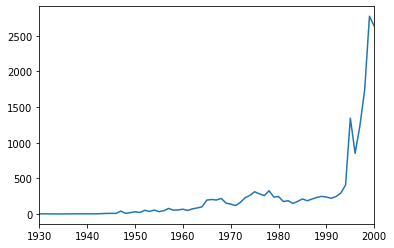

In [31]:
# plot the number of UFO reports per year (line plot is the default)
ufo.Year.value_counts().sort_index().plot()

###  'Year' = column of interest / 'value_counts' = pick values / 'sort_index' = put in the order / plot() = plot the list